In [ ]:
<h6>Class URL</h6>
<p>https://www.coursera.org/learn/dna-analysis/home/welcome</p>
The URL is a generic URL. This is the UCSD course #1 for bioinformatics

<h6>Lecture1 </h6>
Finding hidden message. Given a string of nucleotides find the most common longest substring.
This is the point of origin where the DNA polymerase starts replicating. 

<img src="DNA1.png">



In [ ]:
In the sequence above there are 4 longest frequent substrings! ATGATCAAG,
CTTGATCAT, TCTTGGATCA, CTCTTGATC!. There are 4 9-mers. Which ones are real
and which ones are errors? ATGATCAAG and TACTAGTTC are reverse-complement k-mers!
DNA has direction, you read the revesrse. So you see the noncompleent/complement 6 times.

Find start sequence in hot environment 80 degreesC. 
<img src="DNA2.png">

In [ ]:
The 9-mers in the above string are: AACCTACCA, ACCTACCAC, GGTAGGTTT,
    TGGTAGTT, AAACCTACC, CCTACCACC. The complimentary pairs are: 
        CCTACCACC, GGATGGTGG. The problem is now to find the 500 nucleotide
        region in a sequence of millions of nucleotides? You can look at all
        the 500 nucleotide regions in the genome. What is a clump. A kmer forms
        a (L,t) clump inside a genome if there is a short length L interval 
        in the genome in which the kmer appearsa at least t times. Find all 
        the (L,t) clumps in the hope of finding the oriC. If you run this on
        the E-coli genome there are 1904 different 9-mers forming (500,3) clumps. 
        not clear which of these point to the oriC. 

        
        
        


<img src="courseralec1quizweek1.png">
<p>1)false from the lecture the computational problem is underspecified until we know 
what we are looking for; ie are we looking to establish the ori location based on longest most frequent sequences?
</p>
<p>2)the count is 6. Run: Threemer.count()</p>
<p>3)run Threemer.find3mer()</p>
<p>4) have no idea what format this answer should be in, I used CSV and it failed every time
both by computer progran and manually. </p>


<img src="courseraweek1a.png">

<h6>Lecture 2</h6>
<p>The double strand DNA molecule is bound via AT double H bonds and by CG triple H bonds. These H bonds are not covalent and
can be broken easily. Longer chains are more stable. </p>
<p>DNA double strand separation called melting, into 2 single strands can occur at high temperatures, 
low salt and high pH. Higner melting temps for more stable dsDNA molecules. 
</p>
<p>Finding the origin and terminus of the dna. Assuming a circular chain. When the DNA is heated the DNA strands separate. 
There is a natural fork in the DNA which opens and closes. This fork opening and separating the 2 strandsm, when wide enough, 
allows the 4 DNA polymerases to enter and start the process of replication. 
An initiator 
protein starts the unwinding then the protein helicase breaks the H bonds between DNA strands. As the DNA fork expands to approximately
2000 nucleotides,
the enzyme primase (TBD fill in)... In the figure below the 4 strands start separating and the 4 DNA polymerases start adding nucleotides
to the 4 replicated strands. 1) clockwise strand ori->ter, 2) clockwise strand ter->ori, 3) counterclockwise strand ori->ter
4) counterclockwise strand ter->ori. The red markers on the replicated strands are primers. 
</p>
<img src="ori1.png">
<p>Image credit: stepnik lesson week2 coursera class:</p>
<p>DNA can only copy continuously in the 3'->5' direction. When copying the opposite reverse strand in the 3-5 direction
it copies in Okazi fragments then enzyme DNA ligase joins the fragments together. </p>
<img src="ori2.png">
<img src="ori3.png">
<img src="ori4.png">
<img src="ori5.png">
<img src="ori6.png">
<img src="ori7.png">
<b>Deanimation is the cause of the difference between the mutation rates of the nucleotides, ACGT. C has the 
highest mutation rate and it is because C mutates to T in a process called deanimation. The deanimation rate
is 100x higher for single stranded DNA. </b>
<img src="ori8pre.png">
<img src="ori8.png">
<p>There are approx 1M base pairs. There is a skew caused by deanimation of C->T. Converting C->T causes the CG 
imbalance because deanimation occurs 100x more frequently on the Ozaki single strand replication. 

</p>

In [13]:
def max_skew(s):
    list_skew=[]
    list_skew.append(0)
    current_skew = 0
    max_val = 0 #assumes min is 0, this is not necessarily true 
    max_val_pos=[]
    pos=1
    for char in s:
        if(char=="C"):
            current_skew -= 1
        elif(char=="G"):
            current_skew += 1
        list_skew.append(current_skew)
        print("char:",char," current_skew:",current_skew)
        if(current_skew > max_val):
            max_val_pos=[]
            max_val_pos.append(pos)
            max_val=current_skew
        elif(current_skew == max_val):
            max_val_pos.append(pos)
        pos+=1
    print(' '.join(map(str, max_val_pos)))
    print("max list_skew",np.max(list_skew))
    plt.plot(list_skew)
    #print(len(list_skew))
    plt.show()
max_skew("GCATACACTTCCCAGTAGGTACTG")
max_skew("CATTCCAGTACTTCATGATGGCGTGAAGA")

char: G  current_skew: 1
char: C  current_skew: 0
char: A  current_skew: 0
char: T  current_skew: 0
char: A  current_skew: 0
char: C  current_skew: -1
char: A  current_skew: -1
char: C  current_skew: -2
char: T  current_skew: -2
char: T  current_skew: -2
char: C  current_skew: -3
char: C  current_skew: -4
char: C  current_skew: -5
char: A  current_skew: -5
char: G  current_skew: -4
char: T  current_skew: -4
char: A  current_skew: -4
char: G  current_skew: -3
char: G  current_skew: -2
char: T  current_skew: -2
char: A  current_skew: -2
char: C  current_skew: -3
char: T  current_skew: -3
char: G  current_skew: -2
1


NameError: name 'np' is not defined

In [36]:
import matplotlib.pyplot as plt

# this is an exercise where you find the minimum of the skew, Dont understand the first number 11. 
#and the 23 is off by one. 
import numpy as np

def min_skew(s):
    """
    """
    list_skew=[]
    list_skew.append(0)
    current_skew = 0
    min_val = 0 #assumes min is 0, this is not necessarily true 
    min_val_pos=[]
    pos=1
    
    for char in s:
        if(char=="C"):
            current_skew -= 1
        elif(char=="G"):
            current_skew += 1
            
        list_skew.append(current_skew)
        #print("current_skew:",current_skew," min_val:",min_val )
        if(current_skew < min_val):
            min_val_pos=[]
            min_val_pos.append(pos)
            min_val=current_skew
        elif(current_skew == min_val):
            min_val_pos.append(pos)
        pos+=1
    #print("min_val_pos:",min_val_pos)
    print(' '.join(map(str, min_val_pos)))
    #print("list_skew len,s len",len(list_skew),len(s))
    #print("min:",np.min(list_skew))
    
    
s1 = "ACCG"
s2 = "ACCC"
s3 = "CCGGGT"
s4 = "CCGGCCGG"
s5 = "TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT"
s6 = "GATACACTTCCCGAGTAGGTACTG"
s7= "CATTCCAGTACTTCGATGATGGCGTGAAGA"
print(min_skew(s1))
print(min_skew(s2))
print(min_skew(s3))
print(min_skew(s4))
print(min_skew(s5))
print(min_skew(s6))
print(min_skew(s7))



with open('dataset_7_6.txt', 'r') as myfile:
    data=myfile.read() #.replace('\n', '')
    min_skew(data)

3
None
4
None
2
None
2 6
None
11 24
None
12
None
14
None
28167


<img src="skew1.png">
<img src="skew2.png">
The peak of the GC skew graph is the terminus and the bottom is the approzimate area of the ori. 


-139
81587
[28166]


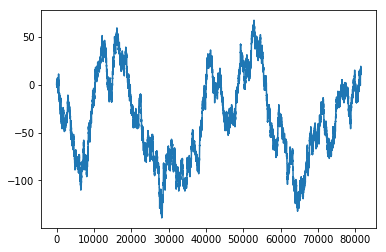

In [30]:
import numpy as np
import matplotlib.pyplot as plt

with open('dataset_7_6.txt', 'r') as myfile:
    data=myfile.read() #.replace('\n', '')
    current_skew = 0
    min_val = 100
    min_val_pos=[]
    list_skew=[]
    list_skew.append(0)
    pos=0
    for x in data:
        if(x=="C"):
            #print("decrementing");
            current_skew -= 1
        elif(x=="G"):
            #print("incrementing");
            current_skew += 1
        list_skew.append(current_skew)
        if(current_skew < min_val):
            min_val_pos=[]
            min_val_pos.append(pos)
            min_val=current_skew
        elif(current_skew == min_val):
            min_val_pos.append(pos)
        pos+=1
        
    print(np.min(list_skew))
    plt.plot(list_skew)
    print(len(list_skew))
    print(min_val_pos)

plt.show()
 

<p>
Finding the minimum skew for ecoli gives 3923620 but if we look at a 500 nucleotide sequence in this area: 
</p>
<p>
aatgatgatgacgtcaaaaggatccggataaaacatggtgattgcctcgc
ataacgcggtatgaaaatggattgaagcccgggccgtggattctactcaa
ctttgtcggcttgagaaagacctgggatcctgggtattaaaaagaagatc
tatttatttagagatctgttctattgtgatctcttattaggatcgcactg
ccctgtggataacaaggatccggcttttaagatcaacaacctggaaagga
tcattaactgtgaatgatcggtgatcctggaccgtataagctgggatcag
aatgaggggttatacacaactcaaaaactgaacaacagttgttctttgga
taactaccggttgatccaagcttcctgacagagttatccacagtagatcg
cacgatctgtatacttatttgagtaaattaacccacgatcccagccattc
ttctgccggatcttccggaatgtcgtgatcaagaatgttgatcttcagtg
</p>
<p>
we cant find any frequent 9mers along with their reverse complement in location 3923620. We are looking for the DNAbox. 
If we go back to our other example Vibrio cholerae we can see at the 500 nucleotide BP window we do see frequent 9mers where 
there are 3 each to meet our frequency requirement and there is somthing additonal odd which there is one sequence with 
1 N off. 

</p>
<img src="ori9.png">

In [7]:
def hamming(p,q):
    """
    assume equal length strings
    return the number of mismatches or hamming distance 
    """
    
    hd=0
    for p_char, q_char in zip(p,q):
        if(p_char!=q_char):
            hd+=1
    return hd

with open('dataset_9_3.txt','r') as f:
    line=f.read()
    splitMe=line.split()
    print(len(splitMe))
    hamming(splitMe[0],splitMe[1])

    

2


In [48]:
s1="CTTGAAGTGGACCTCTAGTTCCTCTACAAAGAACAGGTTGACCTGTCGCGAAG"
s2="ATGCCTTACCTAGATGCAATGACGGACGTATTCCTTTTGCCTCAACGGCTCCT"
print(hamming(s1,s2))
s1="CAGAAAGGAAGGTCCCCATACACCGACGCACCAGTTTA"
s2="CACGCCGTATGCATAAACGAGCCGCACGAACCAGAGAG"
print(hamming(s1,s2))
s1="CTACAGCAATACGATCATATGCGGATCCGCAGTGGCCGGTAGACACACGT"
s2="CTACCCCGCTGCTCAATGACCGGGACTAAAGAGGCGAAGATTATGGTGTG"
print(hamming(s1,s2))
s1="CTACAGCAATACGATCATATGCGGATCCGCAGTGGCCGGTAGACACACGT"
s2="CTACCCCGCTGCTCAATGACCGGGACTAAAGAGGCGAAGATTATGGTGTG"
print(hamming(s1,s2))


43
23
36
36


In [64]:
kmer="ATTCTGGA"
text="CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT"
dist=3


def mismatch(kmer,text,num_mismatches):
    """
    return approximate matches w/num mismatch as num of errors
    """
    num_matches=0
    pos_list=[]
    for start in range(0,len(text)-len(kmer)):
        substring = text[start:start+len(kmer)]
        dist = hamming(kmer, substring)
        print(substring,dist)
        if (dist <= num_mismatches):
            pos_list.append(start)
    print(' '.join(map(str,pos_list)))
mismatch(kmer,text,dist)

CGCCCGAA 5
GCCCGAAT 7
CCCGAATC 8
CCGAATCC 8
CGAATCCA 6
GAATCCAG 8
AATCCAGA 3
ATCCAGAA 3
TCCAGAAC 8
CCAGAACG 8
CAGAACGC 7
AGAACGCA 5
GAACGCAT 7
AACGCATT 7
ACGCATTC 6
CGCATTCC 7
GCATTCCC 7
CATTCCCA 6
ATTCCCAT 4
TTCCCATA 5
TCCCATAT 7
CCCATATT 7
CCATATTT 8
CATATTTC 6
ATATTTCG 5
TATTTCGG 5
ATTTCGGG 3
TTTCGGGA 2
TTCGGGAC 6
TCGGGACC 8
CGGGACCA 7
GGGACCAC 8
GGACCACT 7
GACCACTG 7
ACCACTGG 6
CCACTGGC 4
CACTGGCC 7
ACTGGCCT 6
CTGGCCTC 7
TGGCCTCC 7
GGCCTCCA 5
GCCTCCAC 8
CCTCCACG 6
CTCCACGG 5
TCCACGGT 6
CCACGGTA 5
CACGGTAC 8
ACGGTACG 6
CGGTACGG 7
GGTACGGA 4
GTACGGAC 5
TACGGACG 8
ACGGACGT 6
CGGACGTC 7
GGACGTCA 6
GACGTCAA 6
ACGTCAAT 7
CGTCAATC 6
GTCAATCA 6
TCAATCAA 6
CAATCAAA 7
6 7 26 27


In [65]:
with open('dataset_9_4.txt','r') as f:
    line=f.read()
    splitMe=line.split()
    print(len(splitMe))
    kmer=splitMe[0].strip()
    print("kmer:",kmer,len(kmer))
    text=splitMe[1].strip()
    dist=int(splitMe[2])
    mismatch(kmer,text,dist)

3
kmer: GGGGGTGACTG 11
CGGTCCCAATC 7
GGTCCCAATCG 7
GTCCCAATCGG 8
TCCCAATCGGA 11
CCCAATCGGAC 10
CCAATCGGACT 10
CAATCGGACTC 7
AATCGGACTCG 9
ATCGGACTCGC 8
TCGGACTCGCC 9
CGGACTCGCCA 7
GGACTCGCCAG 6
GACTCGCCAGA 10
ACTCGCCAGAA 9
CTCGCCAGAAC 10
TCGCCAGAACC 8
CGCCAGAACCA 8
GCCAGAACCAT 8
CCAGAACCATT 9
CAGAACCATTA 8
AGAACCATTAA 10
GAACCATTAAT 10
AACCATTAATG 7
ACCATTAATGT 9
CCATTAATGTT 10
CATTAATGTTC 10
ATTAATGTTCG 8
TTAATGTTCGC 10
TAATGTTCGCC 9
AATGTTCGCCA 8
ATGTTCGCCAT 8
TGTTCGCCATA 9
GTTCGCCATAC 8
TTCGCCATACA 10
TCGCCATACAC 8
CGCCATACACG 8
GCCATACACGT 8
CCATACACGTT 10
CATACACGTTT 10
ATACACGTTTT 9
TACACGTTTTG 9
ACACGTTTTGG 8
CACGTTTTGGA 9
ACGTTTTGGAC 9
CGTTTTGGACG 7
GTTTTGGACGA 7
TTTTGGACGAT 10
TTTGGACGATG 7
TTGGACGATGG 6
TGGACGATGGG 8
GGACGATGGGA 8
GACGATGGGAA 7
ACGATGGGAAC 9
CGATGGGAACG 6
GATGGGAACGG 5
ATGGGAACGGA 8
TGGGAACGGAG 7
GGGAACGGAGA 7
GGAACGGAGAT 7
GAACGGAGATG 7
AACGGAGATGC 7
ACGGAGATGCG 8
CGGAGATGCGA 7
GGAGATGCGAA 6
GAGATGCGAAT 9
AGATGCGAATG 5
GATGCGAATGC 8
ATGCGAATGCC 9
TGCGAATGCCG

In [37]:
#Count1(CGTGACAGTGTATGGGCATCTTT, TGT)

def count_1(text,kmer):
    """
    """
    num_match=0
    #off by one fixed but leave the original for documentation!!
    for i in range(0,len(text)-len(kmer)+1):
        substring = text[i:i+len(kmer)]
        print("substring:",substring, hamming(substring,kmer))
        if(match(substring,kmer)):
            num_match+=1
    print(num_match)
    

def match(a,b,d=1):
    """
    """
    if(hamming(a,b) <= d):
        return True
    return False
print(match("TGT","TGG"))
print(match("TGT","TTG"))
print(match("TGT","TTG",d=2))
print("testing count:")
#count_1("CGTGACAGTGTATGGGCATCTTT", "TGT")
#count_1("TACGCATTACAAAGCACA", "AA")
#note off by one AAAGA was the last string compared but it should be AAGAG!!!!
count_1("AACAAGCTGATAAACATTTAAAGAG","AAAAA")
#count1 means 1 mismatch? 4 if 1 nucleotide mismatch

True
False
True
testing count:
substring: AACAA 1
substring: ACAAG 2
substring: CAAGC 3
substring: AAGCT 3
substring: AGCTG 4
substring: GCTGA 4
substring: CTGAT 4
substring: TGATA 3
substring: GATAA 2
substring: ATAAA 1
substring: TAAAC 2
substring: AAACA 1
substring: AACAT 2
substring: ACATT 3
substring: CATTT 4
substring: ATTTA 3
substring: TTTAA 3
substring: TTAAA 2
substring: TAAAG 2
substring: AAAGA 1
4


In [54]:
def Count_d(text, kmer,d=2):
    """
    among all k-mers
    Frequent Words with Mismatches Problem: Find the most frequent k-mers with mismatches in a string.
    Input: A string Text as well as integers k and d. (You may assume k ≤ 12 and d ≤ 3.)
    Output: All most frequent k-mers with up to d mismatches in Text.
    """
    num_match=0
    for i in range(0,len(text)-len(kmer)+1):
        substring = text[i:i+len(kmer)]
        print("substring:",substring, hamming(substring,kmer))
        if(match(substring,kmer,d)):
            num_match+=1
    print(num_match)

Count_d("AACAAGCTGATAAACATTTAAAGAG","AAAAA")
Count_d("CATGCCATTCGCATTGTCCCAGTGA","CCC")
Count_d("TACGCATTACAAAGCACA","AA",d=1)


substring: AACAA 1
substring: ACAAG 2
substring: CAAGC 3
substring: AAGCT 3
substring: AGCTG 4
substring: GCTGA 4
substring: CTGAT 4
substring: TGATA 3
substring: GATAA 2
substring: ATAAA 1
substring: TAAAC 2
substring: AAACA 1
substring: AACAT 2
substring: ACATT 3
substring: CATTT 4
substring: ATTTA 3
substring: TTTAA 3
substring: TTAAA 2
substring: TAAAG 2
substring: AAAGA 1
substring: AAGAG 2
11
substring: CAT 2
substring: ATG 3
substring: TGC 2
substring: GCC 1
substring: CCA 1
substring: CAT 2
substring: ATT 3
substring: TTC 2
substring: TCG 2
substring: CGC 1
substring: GCA 2
substring: CAT 2
substring: ATT 3
substring: TTG 3
substring: TGT 3
substring: GTC 2
substring: TCC 1
substring: CCC 0
substring: CCA 1
substring: CAG 2
substring: AGT 3
substring: GTG 3
substring: TGA 3
15
substring: TA 1
substring: AC 1
substring: CG 2
substring: GC 2
substring: CA 1
substring: AT 1
substring: TT 2
substring: TA 1
substring: AC 1
substring: CA 1
substring: AA 0
substring: AA 0
substring: A

In [ ]:
AACAA 1
ACAAG 2
GATAA 2
ATAAA 1
TAAAC 2
AAACA 1
AACAT 2
TTAAA 2
TAAAG 2
AAAGA 1

AACAA
ACAAG
GATAA
ATAAA
TAAAC
AAACA
AACAT
TTAAA
TAAAG
AAAGA
AAGAG

In [ ]:
#frequent mismatches and reverse palindrome

def count_palindrome():
    """
      Input: A DNA string Text as well as integers k and d.
      Output: All k-mers Pattern maximizing the sum Countd(Text, Pattern)+ Countd(Text, Patternrc) 
      over all possible k-mers.
    """
    

In [34]:
import numpy as np

def make_kmers(kmer, hamming_dist):
    """
    return list of kmers hamming_dist away
    """
    first_twoN = np.array([[ "AA",  "CA",  "GA",  "TA"],
                           [ "AC",  "CG",  "GC",  "TC"],
                           [ "AG",  "CC",  "GG",  "TG"],
                           [ "AT",  "CT",  "GT",  "TT"]])
    second_twoN = np.array([[ "AA",  "CA",  "GA",  "TA"],
                           [ "AC",  "CG",  "GC",  "TC"],
                           [ "AG",  "CC",  "GG",  "TG"],
                           [ "AT",  "CT",  "GT",  "TT"]])
    
    print(type(first_twoN[0][0]))
    #second_twoN = np.zeros(shape=[4,4], dtype=np.str_)
    #np.copyto(first_twoN, second_twoN)
    print(first_twoN.shape)
    #print(second_twoN.shape)
    num=0
    num_d=0
    for i in range(0,4):
        for j in range(0,4):
            #print (first_twoN[i][j])
            for i1 in range(0,4):
                for j1 in range(0,4):
                    test_kmer = first_twoN[i][j]+second_twoN[i1][j1] 
                    print(test_kmer, hamming(test_kmer,kmer))
                    if(hamming(test_kmer,kmer)<=3):
                        num_d +=1
                    num+=1
    #error check, 256
    print(num,num_d)
make_kmers("ACGT",4)

<class 'numpy.str_'>
(4, 4)
AAAA 3
AACA 3
AAGA 2
AATA 3
AAAC 3
AACG 3
AAGC 2
AATC 3
AAAG 3
AACC 3
AAGG 2
AATG 3
AAAT 2
AACT 2
AAGT 1
AATT 2
CAAA 4
CACA 4
CAGA 3
CATA 4
CAAC 4
CACG 4
CAGC 3
CATC 4
CAAG 4
CACC 4
CAGG 3
CATG 4
CAAT 3
CACT 3
CAGT 2
CATT 3
GAAA 4
GACA 4
GAGA 3
GATA 4
GAAC 4
GACG 4
GAGC 3
GATC 4
GAAG 4
GACC 4
GAGG 3
GATG 4
GAAT 3
GACT 3
GAGT 2
GATT 3
TAAA 4
TACA 4
TAGA 3
TATA 4
TAAC 4
TACG 4
TAGC 3
TATC 4
TAAG 4
TACC 4
TAGG 3
TATG 4
TAAT 3
TACT 3
TAGT 2
TATT 3
ACAA 2
ACCA 2
ACGA 1
ACTA 2
ACAC 2
ACCG 2
ACGC 1
ACTC 2
ACAG 2
ACCC 2
ACGG 1
ACTG 2
ACAT 1
ACCT 1
ACGT 0
ACTT 1
CGAA 4
CGCA 4
CGGA 3
CGTA 4
CGAC 4
CGCG 4
CGGC 3
CGTC 4
CGAG 4
CGCC 4
CGGG 3
CGTG 4
CGAT 3
CGCT 3
CGGT 2
CGTT 3
GCAA 3
GCCA 3
GCGA 2
GCTA 3
GCAC 3
GCCG 3
GCGC 2
GCTC 3
GCAG 3
GCCC 3
GCGG 2
GCTG 3
GCAT 2
GCCT 2
GCGT 1
GCTT 2
TCAA 3
TCCA 3
TCGA 2
TCTA 3
TCAC 3
TCCG 3
TCGC 2
TCTC 3
TCAG 3
TCCC 3
TCGG 2
TCTG 3
TCAT 2
TCCT 2
TCGT 1
TCTT 2
AGAA 3
AGCA 3
AGGA 2
AGTA 3
AGAC 3
AGCG 3
AGGC 2
AGTC 3
AGAG 3
AGCC 3
AGGG 2

In [1]:
list("ACGT")

['A', 'C', 'G', 'T']

In [6]:
num=0
kmers=[]
for x in list("ACGT"):
    for y in list("ACGT"):
        for z in list("ACGT"):
            for a in list("ACGT"):
                #print(x+y+z+a)
                kmers.append(x+y+z+a)
                num+=1
print(num)
print(kmers)
print(len(kmers))

256
['AAAA', 'AAAC', 'AAAG', 'AAAT', 'AACA', 'AACC', 'AACG', 'AACT', 'AAGA', 'AAGC', 'AAGG', 'AAGT', 'AATA', 'AATC', 'AATG', 'AATT', 'ACAA', 'ACAC', 'ACAG', 'ACAT', 'ACCA', 'ACCC', 'ACCG', 'ACCT', 'ACGA', 'ACGC', 'ACGG', 'ACGT', 'ACTA', 'ACTC', 'ACTG', 'ACTT', 'AGAA', 'AGAC', 'AGAG', 'AGAT', 'AGCA', 'AGCC', 'AGCG', 'AGCT', 'AGGA', 'AGGC', 'AGGG', 'AGGT', 'AGTA', 'AGTC', 'AGTG', 'AGTT', 'ATAA', 'ATAC', 'ATAG', 'ATAT', 'ATCA', 'ATCC', 'ATCG', 'ATCT', 'ATGA', 'ATGC', 'ATGG', 'ATGT', 'ATTA', 'ATTC', 'ATTG', 'ATTT', 'CAAA', 'CAAC', 'CAAG', 'CAAT', 'CACA', 'CACC', 'CACG', 'CACT', 'CAGA', 'CAGC', 'CAGG', 'CAGT', 'CATA', 'CATC', 'CATG', 'CATT', 'CCAA', 'CCAC', 'CCAG', 'CCAT', 'CCCA', 'CCCC', 'CCCG', 'CCCT', 'CCGA', 'CCGC', 'CCGG', 'CCGT', 'CCTA', 'CCTC', 'CCTG', 'CCTT', 'CGAA', 'CGAC', 'CGAG', 'CGAT', 'CGCA', 'CGCC', 'CGCG', 'CGCT', 'CGGA', 'CGGC', 'CGGG', 'CGGT', 'CGTA', 'CGTC', 'CGTG', 'CGTT', 'CTAA', 'CTAC', 'CTAG', 'CTAT', 'CTCA', 'CTCC', 'CTCG', 'CTCT', 'CTGA', 'CTGC', 'CTGG', 'CTGT', 'CT

In [12]:
num_yes=0
for x in kmers:
    dist = hamming(x,"ACGT")
    if(dist<=3):
        num_yes+=1
    print("processing:",x,dist,num_yes)

print(num_yes)
    
    

processing: AAAA 3 1
processing: AAAC 3 2
processing: AAAG 3 3
processing: AAAT 2 4
processing: AACA 3 5
processing: AACC 3 6
processing: AACG 3 7
processing: AACT 2 8
processing: AAGA 2 9
processing: AAGC 2 10
processing: AAGG 2 11
processing: AAGT 1 12
processing: AATA 3 13
processing: AATC 3 14
processing: AATG 3 15
processing: AATT 2 16
processing: ACAA 2 17
processing: ACAC 2 18
processing: ACAG 2 19
processing: ACAT 1 20
processing: ACCA 2 21
processing: ACCC 2 22
processing: ACCG 2 23
processing: ACCT 1 24
processing: ACGA 1 25
processing: ACGC 1 26
processing: ACGG 1 27
processing: ACGT 0 28
processing: ACTA 2 29
processing: ACTC 2 30
processing: ACTG 2 31
processing: ACTT 1 32
processing: AGAA 3 33
processing: AGAC 3 34
processing: AGAG 3 35
processing: AGAT 2 36
processing: AGCA 3 37
processing: AGCC 3 38
processing: AGCG 3 39
processing: AGCT 2 40
processing: AGGA 2 41
processing: AGGC 2 42
processing: AGGG 2 43
processing: AGGT 1 44
processing: AGTA 3 45
processing: AGTC 3 